<a href="https://colab.research.google.com/github/Praneethsvch/ARISE-summer21-NYU/blob/main/FloodSense_ARISE_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#installing influxdb
!pip install influxdb

In [5]:
import pandas as pd
from influxdb import InfluxDBClient

In [31]:
client = InfluxDBClient(host='floodnet-influxdb.sonycproject.com', ssl=True, port=0, database='db0')

In [14]:
measure = 'distance'
table = 'msg' 
app_id = 'deployment_one_app' 
dev_id = 'sensor_2'   #sensor_2 -> Hoyt and 5th #sensor_4 ->Gowanus canal sensor
days_back = 300

query = 'SELECT "%s" ' \
        'FROM "%s" ' \
        'WHERE "app_id" = \'%s\' ' \
        'AND "dev_id" = \'%s\' ' \
        'AND "time" >= now() - %id'\
        % (measure, table, app_id, dev_id, days_back)

data = client.query(query)

value_data = data.raw['series'][0]['values']

df_Hoyt = pd.DataFrame(value_data, columns =['datetime', 'distance'])

df_Hoyt['datetime'] = pd.to_datetime(df_Hoyt['datetime'], format='%Y-%m-%dT%H:%M:%S.%f')
df_Hoyt['localtime'] = df_Hoyt['datetime'].dt.tz_convert('US/Eastern')

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [15]:
df_Hoyt

,datetime,distance,localtime
0,2020-10-03 16:36:31.220184+00:00,4986.0,2020-10-03 12:36:31.220184-04:00
1,2020-10-03 16:36:34.399313+00:00,0.0,2020-10-03 12:36:34.399313-04:00
2,2020-10-03 16:44:48.272278+00:00,4163.0,2020-10-03 12:44:48.272278-04:00
3,2020-10-03 16:53:06.221785+00:00,4154.0,2020-10-03 12:53:06.221785-04:00
4,2020-10-03 16:57:15.343493+00:00,4145.0,2020-10-03 12:57:15.343493-04:00
...,...,...,...
99764,2021-07-30 14:23:21.990961+00:00,2710.0,2021-07-30 10:23:21.990961-04:00
99765,2021-07-30 14:27:28.000298+00:00,4978.0,2021-07-30 10:27:28.000298-04:00
99766,2021-07-30 14:31:33.958986+00:00,2715.0,2021-07-30 10:31:33.958986-04:00
99767,2021-07-30 14:35:39.868492+00:00,2711.0,2021-07-30 10:35:39.868492-04:00


In [39]:
import datetime
from datetime import timedelta
from matplotlib.dates import DateFormatter
from dateutil import tz

In [40]:
measure = 'distance'
table = 'msg' 
app_id = 'deployment_one_app' #deployment one: 2 sensors were deployed
dev_id = 'sensor_4'   #sensor_2 -> Hoyt and 5th #sensor_4 ->Gowanus canal sensor
days_back = 300

query = 'SELECT "%s" ' \
        'FROM "%s" ' \
        'WHERE "app_id" = \'%s\' ' \
        'AND "dev_id" = \'%s\' ' \
        'AND "time" >= now() - %id'\
        % (measure, table, app_id, dev_id, days_back)

data = client.query(query)

value_data = data.raw['series'][0]['values']

df_Gowanus = pd.DataFrame(value_data, columns =['datetime', 'distance'])

df_Gowanus['datetime'] = pd.to_datetime(df_Gowanus['datetime'], format='%Y-%m-%dT%H:%M:%S.%f')
df_Gowanus['datetime'] = df_Gowanus['datetime'].dt.tz_convert('US/Eastern')

/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [41]:
df_Gowanus

,datetime,distance
0,2020-10-03 13:50:38.403201-04:00,299.0
1,2020-10-03 13:58:55.011323-04:00,300.0
2,2020-10-03 14:03:03.440333-04:00,300.0
3,2020-10-03 14:11:20.509681-04:00,300.0
4,2020-10-03 14:15:29.105574-04:00,299.0
...,...,...
98915,2021-07-30 10:48:21.044889-04:00,3126.0
98916,2021-07-30 10:52:25.001961-04:00,3097.0
98917,2021-07-30 10:56:28.933496-04:00,3085.0
98918,2021-07-30 11:00:32.798772-04:00,3063.0


In [18]:
import matplotlib.pyplot as plt

In [19]:
%config InlineBackend.figure_format = 'retina' # make plots look better

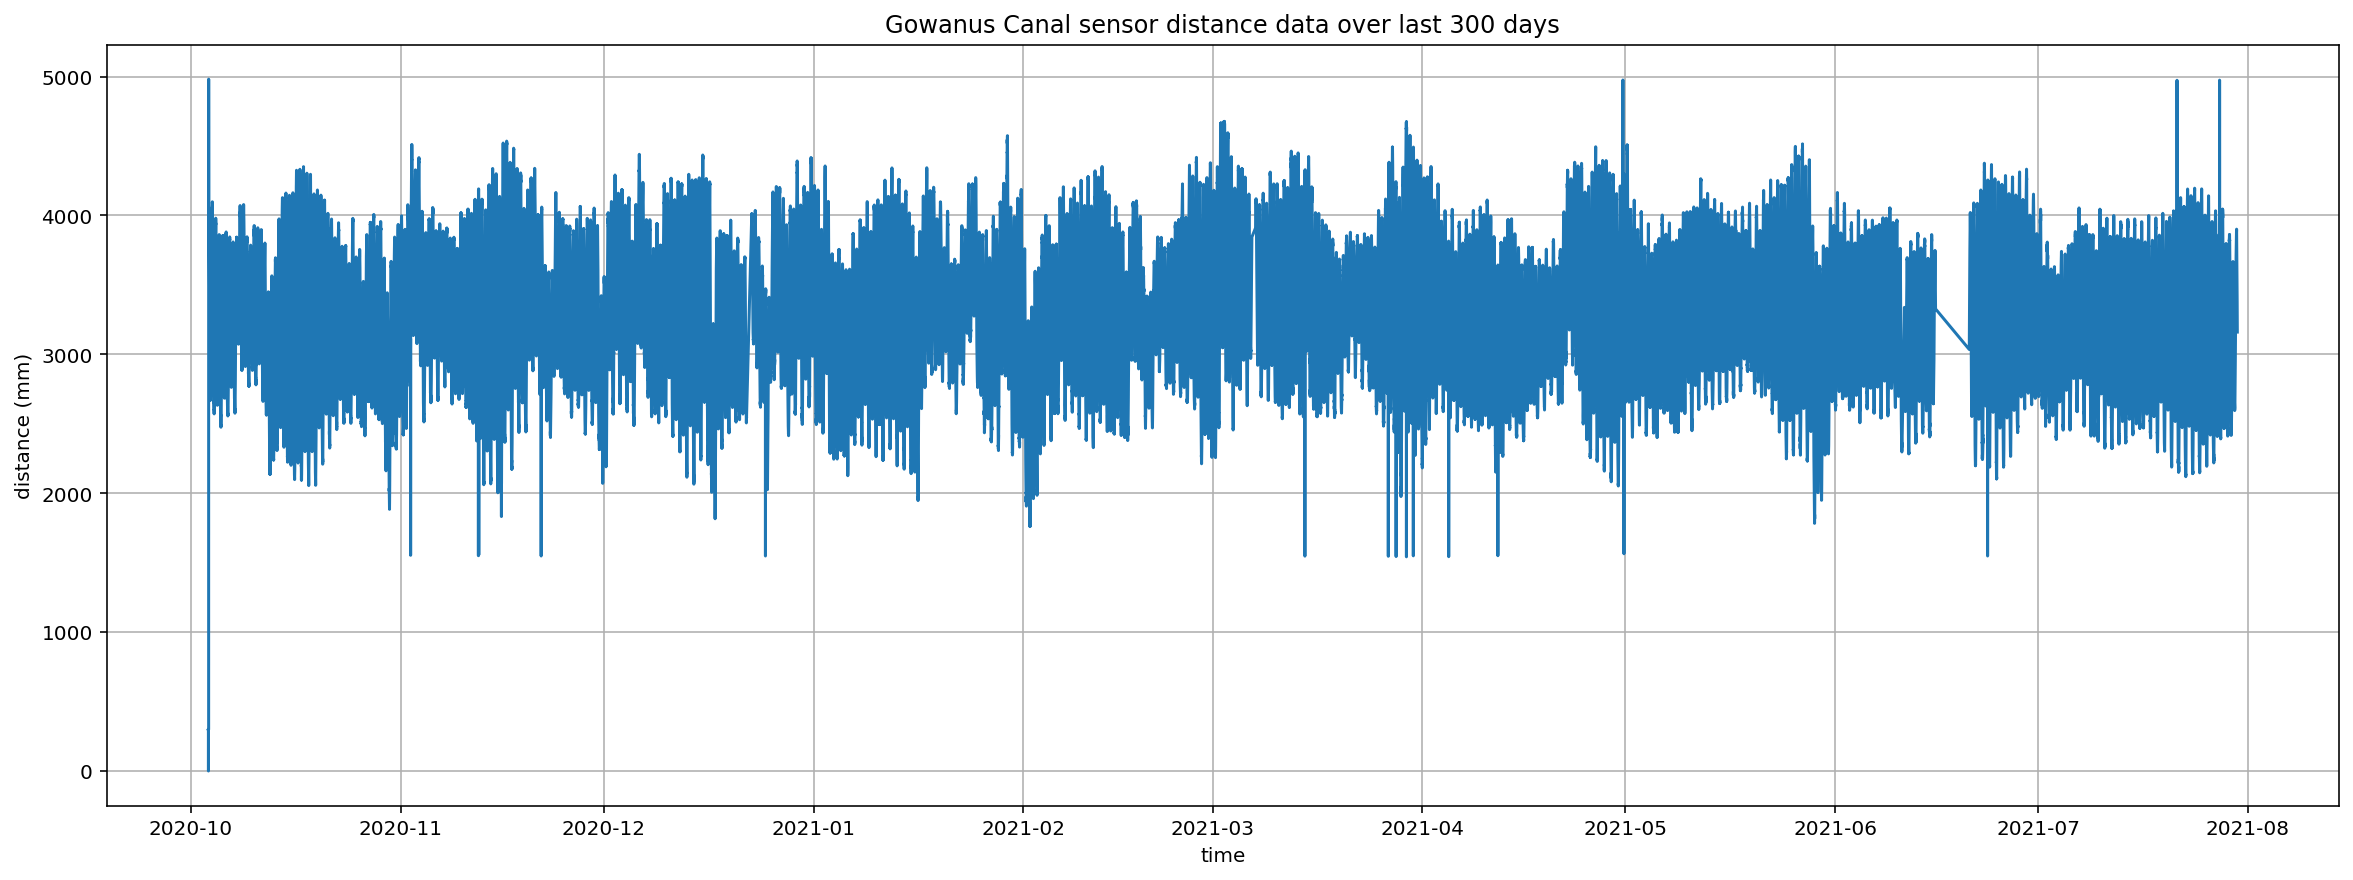

In [21]:
plt.figure(figsize = (20, 7))
plt.plot(df_Gowanus["localtime"], df_Gowanus["distance"])
plt.ylabel("distance (mm)")
plt.xlabel("time")
plt.title("Gowanus Canal sensor distance data over last 300 days")
plt.grid(True)

In [43]:
start = '2021-07-29 00:00'
end = '2021-07-30 00:00'

In [45]:
#df_Gowanus_29thJuly = df_Gowanus.loc[ df_Gowanus['datetime']>start & df_Gowanus['datetime']<end] #hw1 plot yesterdays data

In [28]:
df_Gowanus_29thJuly

Series([], Name: localtime, dtype: datetime64[ns, US/Eastern])

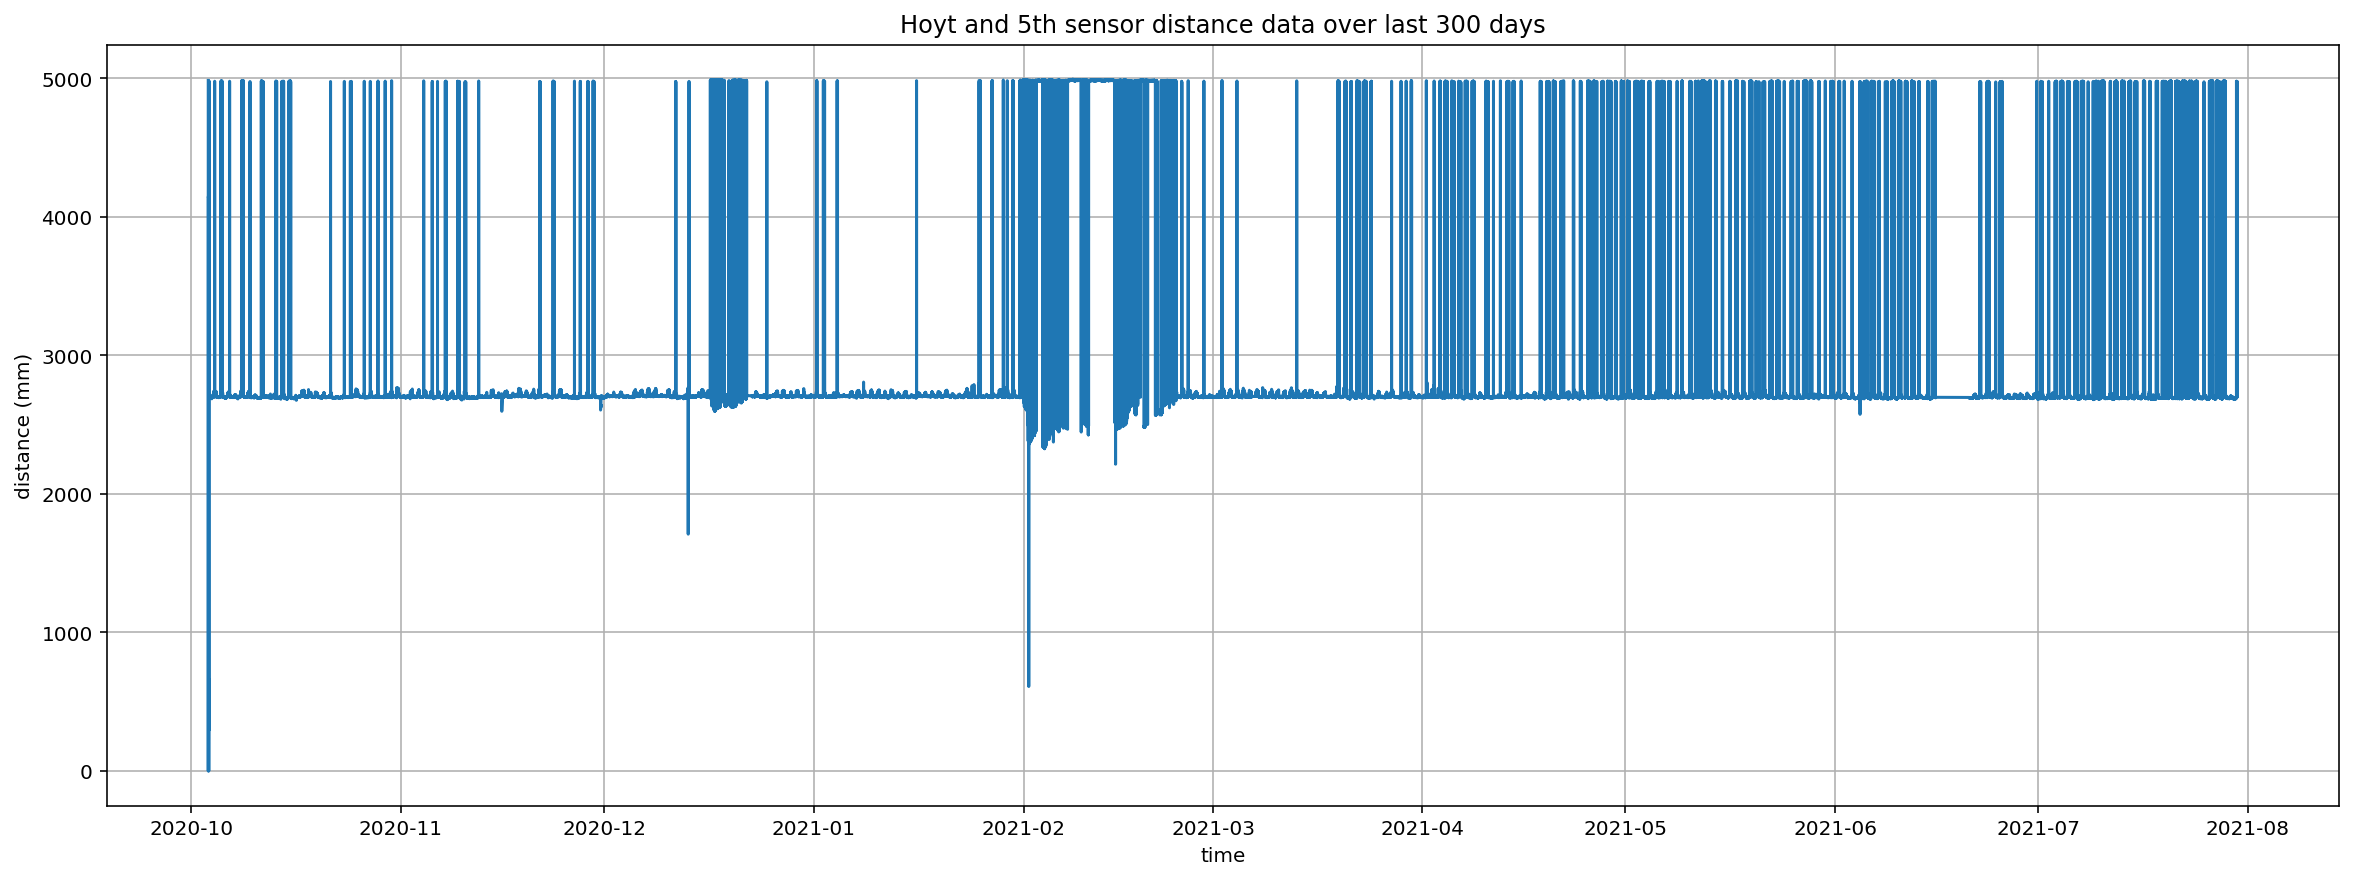

In [46]:
plt.figure(figsize = (20, 7))
plt.plot(df_Hoyt["localtime"], df_Hoyt["distance"])
plt.ylabel("distance (mm)")
plt.xlabel("time")
plt.title("Hoyt and 5th sensor distance data over last 300 days")
plt.grid(True)

In [48]:
#hw2
#calculate depth from the above distances